<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:
df = pd.read_csv("data.csv", sep=",") 

W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = df.dtypes[df.dtypes == 'object']
numerical = df.dtypes[df.dtypes != 'object']
print('Dane tektowe zawierają kolumny :\n\n', list(categorical.index))
print('\nDane liczbowe zawierają kolumny :\n\n', list(numerical.index))

Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

Dane liczbowe zawierają kolumny :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df[df==' ?'] = np.nan
df.isna().sum()



age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [6]:
df = df.dropna(axis=0, how='any')
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
df.shape

(30162, 15)

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [8]:
X = df.drop(['income'],axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [9]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [10]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

print(f"Wynik klasyfikacji: {y_pred}")


Wynik klasyfikacji: [' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']


In [11]:
from sklearn.metrics import accuracy_score
print(f'Dokładność modelu: {accuracy_score(y_test, y_pred)}')

Dokładność modelu: 0.7832909713780528


In [12]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test,y_pred)
print("Macierz błędu:\n", conf_matrix)

print("\nWyniki klasyfikacji za pomocą modelu:")

print(f"True Negative: {conf_matrix[0,0]}")
print(f"True Positive: {conf_matrix[1,1]}")
print(f"False Positive: {conf_matrix[0,1]}")
print(f"False Negative: {conf_matrix[1,0]}")

Macierz błędu:
 [[6423  341]
 [1620  665]]

Wyniki klasyfikacji za pomocą modelu:
True Negative: 6423
True Positive: 665
False Positive: 341
False Negative: 1620


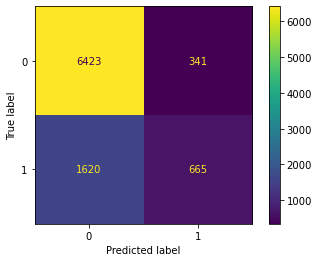

In [13]:
matrix_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
matrix_plot.plot()
plt.show()

In [14]:
print("Raport klasyfikatora:")
print(classification_report(y_test, y_pred))

Raport klasyfikatora:
              precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      6764
        >50K       0.66      0.29      0.40      2285

    accuracy                           0.78      9049
   macro avg       0.73      0.62      0.64      9049
weighted avg       0.76      0.78      0.75      9049



Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

### Uczenie dla kolumny 'race'

In [15]:
X = df.drop(['race'],axis=1)
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

print(f"Wynik klasyfikacji: {y_pred}")

Wynik klasyfikacji: [' White' ' White' ' White' ... ' White' ' White' ' White']


### Dokładność modelu

In [17]:
print(f'Dokładność modelu: {accuracy_score(y_test, y_pred)}')

Dokładność modelu: 0.841308431870925


### Macierz błędu

In [18]:
conf_matrix = confusion_matrix(y_test,y_pred)
print("Macierz błędu:\n", conf_matrix)

Macierz błędu:
 [[   0    0    0    0   82]
 [   0    0    0    2  268]
 [   0    0   38    1  839]
 [   0    0    1    0   68]
 [   0    0  140   35 7575]]


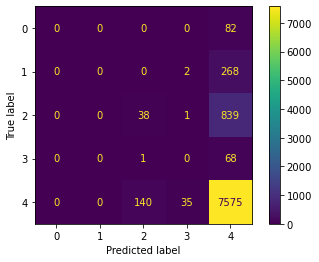

In [19]:
matrix_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
matrix_plot.plot()
plt.show()

In [20]:
print("Raport klasyfikatora:")
print(classification_report(y_test, y_pred,zero_division=0))

Raport klasyfikatora:
                     precision    recall  f1-score   support

 Amer-Indian-Eskimo       0.00      0.00      0.00        82
 Asian-Pac-Islander       0.00      0.00      0.00       270
              Black       0.21      0.04      0.07       878
              Other       0.00      0.00      0.00        69
              White       0.86      0.98      0.91      7750

           accuracy                           0.84      9049
          macro avg       0.21      0.20      0.20      9049
       weighted avg       0.76      0.84      0.79      9049



### Uczenie dla kolumny "native country"

In [21]:
X = df.drop(['native_country'],axis=1)
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [22]:
encoder = ce.OneHotEncoder()
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

print(f"Wynik klasyfikacji: {y_pred}")

Wynik klasyfikacji: [' Dominican-Republic' ' Honduras' ' Dominican-Republic' ... ' Greece'
 ' Dominican-Republic' ' Honduras']


### Dokładność modelu

In [23]:
print(f'Dokładność modelu: {accuracy_score(y_test, y_pred)}')

Dokładność modelu: 0.06774229196596308


### Macierz błędu:

In [24]:
conf_matrix = confusion_matrix(y_test,y_pred)
print("Macierz błędu:\n", conf_matrix)

Macierz błędu:
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   4 ... 593   0 309]
 [  0   0   0 ...   2   0   0]
 [  0   0   0 ...   1   0   0]]


In [25]:
print("\nRaport klasyfikatora:\n")
print(classification_report(y_test, y_pred,zero_division=0))


Raport klasyfikatora:

                             precision    recall  f1-score   support

                   Cambodia       0.00      0.00      0.00         2
                     Canada       0.00      0.00      0.00        40
                      China       0.00      0.00      0.00        21
                   Columbia       0.00      0.00      0.00        21
                       Cuba       0.00      0.00      0.00        36
         Dominican-Republic       0.00      0.70      0.01        23
                    Ecuador       0.00      0.00      0.00        11
                El-Salvador       0.00      0.00      0.00        29
                    England       0.00      0.00      0.00        25
                     France       0.00      0.00      0.00         8
                    Germany       0.00      0.00      0.00        36
                     Greece       0.00      0.00      0.00         5
                  Guatemala       0.00      0.00      0.00        20
         

### Wnioski:

Jak możemy zauważyć wyniki działania klasyfikatora zależą od ilości kategorii, w jakie chcemy pogrupować dane. W przypadku uczenia klasyfikora dla kolumny "income" - klasyfiktor miał przyporządkować dane jedynie do dwóch kategorii, co z lepszym bądź gorszym skutkiem się udawało. Chociaż zdecydowanie lepiej była klasyfikowana wartość "<=50K" niż ">50K". 

Przy uczeniu klasyfikatora dla kolumny "race" - model miał przyporządkować dane już do czterech kategorii. Dla poprawnego przyporządkowania do kategorii "white" otrzymaliśmy dobry wynik, ale nie można już tego powiedzieć o innych kategoriach, ponieważ często zostawały one również uznawane jako "white". 

Dla osotatniego przykładu, dla kolumny "native_country" do sklasyfikowania było już 41 kategorii. Jak widać po wynikach - nie udało się to w żadnym stopniu - model nie sklasyfikował poprawnie danych do zadanych kategorii. 

Przy problemie klasyfikacji bardzo wiele też zależy od zbioru treningowego i wzajemnych zależności między danymi w nim zawartymi, które wpływają na przynależność do danej kategorii.